In [1]:
# Setup tools is now broken
# See here: https://github.com/mozilla/DeepSpeech/issues/3295
#!pip install --upgrade pip==20.0.2 wheel==0.34.2 setuptools==49.6.0
#!pip install --user --force pandas h5netcdf netcdf4 zarr xarray s3fs


In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import Proj

from s3fs import S3FileSystem, S3Map

In [3]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'

In [10]:


def get_hw8_ncistr(band, yyyy, mm, dd, hhmm):
    ncipath = 'http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/'
    hstr = '00-P1S-ABOM_OBS_B{}-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'.format(band)

    timestr = '{}/{}/{}/{}/{}{}{}{}{}'.format(yyyy,mm,dd,hhmm,yyyy,mm,dd,hhmm,hstr)
    fullurl = '{}{}'.format(ncipath,timestr)
    return fullurl


def open_hw8_nci(t1, t2, xlim, ylim, band=14):

    times = pd.date_range(t1,t2,freq='1H')
    url = []
    for tt in times:
        hhmm = '%02d00'%(tt.hour)
        url.append(get_hw8_ncistr(band, str(tt.year), '%02d'%(tt.month), '%02d'%(tt.day), hhmm))

    ds = xr.open_mfdataset(url)
    
    # Reproject the coordinates
    P = Proj(ds.geostationary.proj4, init=None)

    lon,lat = P(ds.x.values, ds.y.values, inverse=True)
    lon[lon>1e10] = np.nan
    lat[lat>1e10] = np.nan
    
    x1,x2 = xlim
    y1,y2 = ylim
    
    i1 = np.argwhere(lon>x1)[0,0]
    i2 = np.argwhere(lon>x2)[0,0]
    j1 = np.argwhere(lat<y1)[0,0]
    j2 = np.argwhere(lat<y2)[0,0]

    x = lon[i1:i2]
    y = lat[j2:j1]

    # Subset the data and assign lat/lon values to the x/y coordinates
    return ds.isel(x=slice(i1,i2), y=slice(j2,j1)).assign_coords({'x':x, 'y':y})



In [130]:
t1 = '2020-08-29 00:00:00'
t2 = '2020-09-02 00:00:00'

# x1,x2 = 120,125
# y1,y2 = -16,-12

x1,x2 = 122,125
y1,y2 = -15,-12

band = 14 # Bands 11 - 15 all in the IR range

ds = open_hw8_nci(t1, t2, (x1,x2), (y1,y2), band=band)
ds

/usr/local/bin/start_ipykernel.py:32: RuntimeWarning: invalid value encountered in greater
/usr/local/bin/start_ipykernel.py:33: RuntimeWarning: invalid value encountered in greater
/usr/local/bin/start_ipykernel.py:34: RuntimeWarning: invalid value encountered in less
/usr/local/bin/start_ipykernel.py:35: RuntimeWarning: invalid value encountered in less


<xarray.Dataset>
Dimensions:                              (time: 97, x: 134, y: 156)
Coordinates:
  * x                                    (x) float64 122.0 122.0 ... 125.0 125.0
  * y                                    (y) float64 -12.01 -12.03 ... -14.99
  * time                                 (time) datetime64[ns] 2020-08-29 ......
Data variables:
    geostationary                        (time) float32 9.96921e+36 ... 9.969...
    scan_line_time                       (time, y) datetime64[ns] dask.array<chunksize=(1, 156), meta=np.ndarray>
    channel_0014_brightness_temperature  (time, y, x) float32 dask.array<chunksize=(1, 156, 134), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  See disclaimer
    cdm_data_type:                   grid
    comment:                         AGLS observations geometry product
    contributor_name:                Commonwealth of Australia, Bureau of Met...
    contributor_role:                Development; Operations
    creator_email:                   sat_support@bom.gov.au
    creator_name:                    Commonwealth of Australia, Bureau of Met...
    creator_url:                     http://www.bom.gov.au/satellite/
    disclaimer:                      You have requested that the Bureau of Me...
    geospatial_lat_resolution:       0.02
    geospatial_lat_units:            degree_north
    geospatial_lon_resolution:       0.02
    geospatial_lon_units:            degree_east
    geospatial_vertical_max:         0
    geospatial_vertical_min:         0
    geospatial_vertical_positive:    up
    geospatial_vertical_resolution:  0
    geospatial_vertical_units:       m
    institution:                     ABOM
    instrument:                      AHI
    keywords:                        EARTH SCIENCE
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    license:                         See disclaimer
    naming_authority:                au.gov.bom
    processing_level:                L2
    product_specification:           AGLS-OBS_data-product-specification_rev0...
    product_suite:                   OBS_B14
    project:                         AGLS
    publisher_email:                 sat_support@bom.gov.au
    publisher_name:                  Commonwealth of Australia, Bureau of Met...
    publisher_url:                   http://www.bom.gov.au/satellite/
    references:                      AGLS observations product
    standard_name_vocabulary:        CF-1.6
    summary:                         AGLS observations product
    time_coverage_duration:          P1S
    time_coverage_resolution:        P1S
    title:                           AGLS observations product suite
    wmo_instrument_name:             Advanced Himawari Imager
    wmo_instrument_type:             297
    wmo_satellite_series:            273
    date_created:                    20200829T000002Z
    history:                         saturnc
    id:                              ABOM_AGLS_OBS_B14_P1S_GRID_v1.1
    netCDF_version:                  4.3.3.1 of Dec 10 2015 16:44:18 $
    processing_version:              1.1
    uuid:                            5d048400-4666-4367-ba04-eb43b01032c8
    geospatial_lat_max:              81.13851
    geospatial_lat_min:              -81.13851
    geospatial_lon_max:              221.89696
    geospatial_lon_min:              59.50304
    platform:                        Himawari-8
    platform_launch_date:            20141007T051600Z
    time_coverage_end:               20200829T000939Z
    time_coverage_start:             20200829T000021Z
    wmo_platform_name:               Himawari-8
    wmo_satellite_number:            173

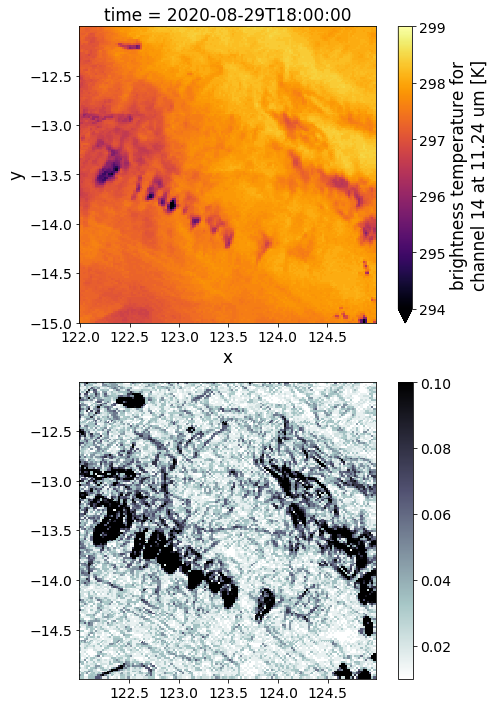

In [135]:
datavar = 'channel_00{}_brightness_temperature'.format(band)
tstep = 18

# Compute the gradient 
i1 = 100
#dx = ds.x.values[i1+1]-ds.x.values[i1]
dx = 2e3
mydata = ds[datavar][tstep,...].values
tnow = ds['time'].values[tstep]
dtdx,dtdy = np.gradient(mydata.squeeze(),dx)
x,y = ds.x.values, ds.y.values

plt.figure(figsize=(8,12))
ax=plt.subplot(211)
ds[datavar][tstep,...].plot(vmin=294, vmax=299, cmap='inferno')
ax.set_aspect('equal')

ax=plt.subplot(212)
plt.pcolormesh(x,y,np.abs(dtdx+1j*dtdy)*1e3, vmin=0.01, vmax=0.1, cmap='bone_r')
#plt.pcolormesh(x,y,np.log(abs(dtdx+1j*dtdy)*1e3), vmin=-4, vmax=-2, cmap='bone_r')

plt.colorbar()
plt.gca().set_aspect('equal')
# plt.title('Himawari Band {} brightness temp gradient [C/km]\n{}'.format(band, str(tnow)[0:19]))

In [18]:
dx

0.023053590661277212